<a href="https://colab.research.google.com/github/syahmins/ImageClassification/blob/main/RockScissorPaper_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all module
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

In [3]:
#prepare temp image location
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [4]:
os.listdir(base_dir)

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2)

In [7]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        shuffle=True,
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
model.fit(
      train_generator,
      steps_per_epoch=32, #jumlah batch yang akan dieksekusi
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)

Epoch 1/20
32/32 - 29s - loss: 1.0536 - accuracy: 0.4690 - val_loss: 0.8460 - val_accuracy: 0.6328 - 29s/epoch - 894ms/step
Epoch 2/20
32/32 - 24s - loss: 0.5728 - accuracy: 0.7892 - val_loss: 0.4952 - val_accuracy: 0.8047 - 24s/epoch - 756ms/step
Epoch 3/20
32/32 - 24s - loss: 0.2851 - accuracy: 0.9064 - val_loss: 0.2865 - val_accuracy: 0.9023 - 24s/epoch - 745ms/step
Epoch 4/20
32/32 - 24s - loss: 0.1805 - accuracy: 0.9409 - val_loss: 0.1826 - val_accuracy: 0.9375 - 24s/epoch - 763ms/step
Epoch 5/20
32/32 - 24s - loss: 0.1321 - accuracy: 0.9507 - val_loss: 0.1586 - val_accuracy: 0.9414 - 24s/epoch - 738ms/step
Epoch 6/20
32/32 - 23s - loss: 0.1081 - accuracy: 0.9658 - val_loss: 0.1696 - val_accuracy: 0.9297 - 23s/epoch - 727ms/step
Epoch 7/20
32/32 - 24s - loss: 0.1252 - accuracy: 0.9521 - val_loss: 0.1777 - val_accuracy: 0.9414 - 24s/epoch - 763ms/step
Epoch 8/20
32/32 - 25s - loss: 0.1171 - accuracy: 0.9596 - val_loss: 0.1125 - val_accuracy: 0.9531 - 25s/epoch - 783ms/step
Epoch 9/

In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 7IYZ788SAadhvemj.png to 7IYZ788SAadhvemj.png
1/1 [==============================] - 0s 178ms/step
7IYZ788SAadhvemj.png
paper


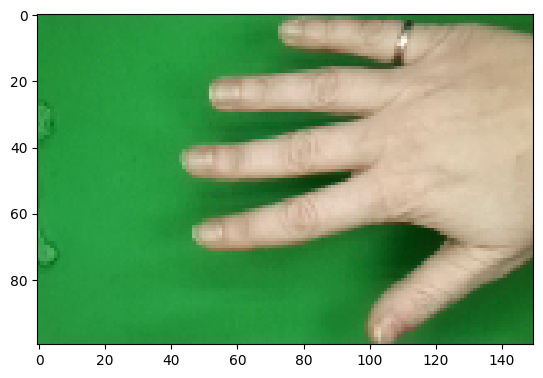

In [12]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')